<a href="https://colab.research.google.com/github/garylau1/model_training/blob/main/University_project_credit_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Risk Dataset Description

The Credit Risk dataset being provided is based on a synthetic dataset publicly available on [Kaggle](https://www.kaggle.com/). It includes various financial attributes to evaluate credit risk. It features 32,581 samples with 11 variables. The key attributes include borrowers' age, employment status, education level, annual income, loan amount, and interest rate. The dataset aims to facilitate the prediction of credit default, that is failure on part of the loan applicant (borrower) to make the loan repayments.

## Setup

## Task 0 - (0 Marks)

Load the dataset using Python.

Preprocess the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df=pd.read_csv('credit_risk_dataset_v3.csv')

# Show first few rows of the dataset
print (df.head())


# Size of the datset
print ('Size of the dataset:', df.shape)
print ('===============================')

# Check if data has null values
print ('null information:')
print ('variable \t number of null values')
print (df.isnull().sum())

# remove null data points from the dataset
# axis = 0 means drop rows which contain missing values.
df = df.dropna(axis=0)
print ('===============================')
print ('Null rows removed. \n')

# Check if data has null values
print ('Updated null information:')
print ('variable \t number of null values')
print (df.isnull().sum())
print ('===============================')
print ('Updated size of the dataset:', df.shape)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y             

loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64
Updated size of the dataset: (28638, 11)


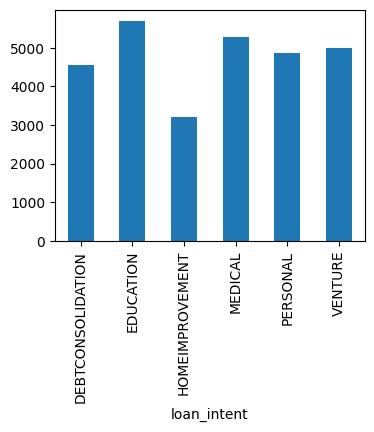

In [ ]:
# Show distribution of the categorical variable 'loan_intent'
print (df['loan_intent'].value_counts())

# Visualize the information
GroupedData=df.groupby('loan_intent').size()
GroupedData.plot(kind='bar', figsize=(4,3))

print ('Updated size of the dataset:', df.shape)

person_income
60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
99200       1
99473       1
47230       1
99670       1
720000      1
Name: count, Length: 3835, dtype: int64
Updated size of the dataset: (28638, 11)


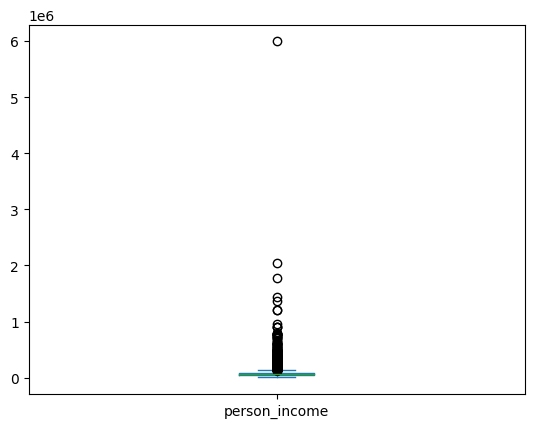

In [ ]:
# Show distribution of the numerical variable 'person_income'
print (df['person_income'].value_counts())

# Visualize the information
# A box plot is a method for graphically depicting groups of numerical data through their quartiles.
df['person_income'].plot.box()


print ('Updated size of the dataset:', df.shape)


In [ ]:
# From the visualization, we notice that 'person_income' has skewness, and log transform can fix the skewness.
df['person_income'] = np.log(df['person_income'])

print ('Updated size of the dataset:', df.shape)

Updated size of the dataset: (28638, 11)


In [ ]:
df.select_dtypes(['object']).columns

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [ ]:
# Some variables, such as 'person_home_ownership' and 'loan_intent', are categorical.
# Others, such as 'person_age' and 'person_income', are numerical.
# We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.

# identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

# Convert categorical variable into dummy/indicator variables.
# Each n-valued variable is converted to n Boolean variables, with 0 indicating FALSE and 1 indicating TRUE.

df = pd.get_dummies(df, columns = cat_columns, dtype=int)

# For example, 'loan_intent' with values EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION and HOMEIMPROVEMENT
# are now converted to 6 dummy columns: loan_intent_EDUCATION, loan_intent_MEDICAL, ..., loan_intent_HOMEIMPROVEMENT, each taking 0/1 as possible values.
df.head()

print ('Updated size of the dataset:', df.shape)

Updated size of the dataset: (28638, 20)


In [ ]:
df.shape

(28638, 20)

# Resample

From the visualization above, we can see that substantially more number of loans were paid on time than defaulted.

This imbalanced dataset is problematic for training a model.

To handle imbalanced dataset, we can either under-sample the majority class or over-sample the minority class.

![Screenshot 2024-05-09 at 10.37.12 pm.png](attachment:56c29b01-07d2-4f5e-a575-13b0fe1b5e5a.png)

In [ ]:
df.shape

(28638, 20)

Random under-sampling:
loan_status
0    6203
1    6203
Name: count, dtype: int64


(12406, 20)

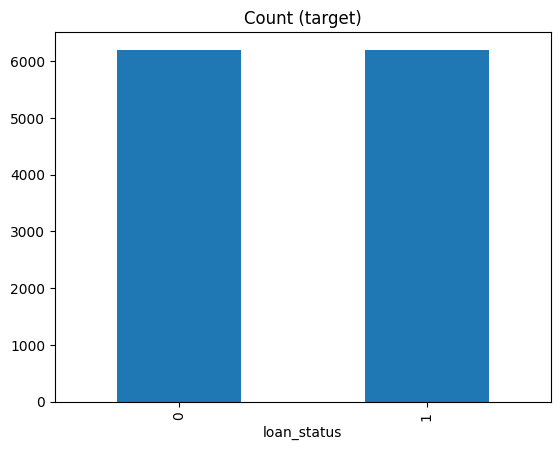

In [ ]:
# Under sample
count_class_0, count_class_1 = df["loan_status"].value_counts()

# Divide by class
df_class_0 = df[df["loan_status"] == 0]
df_class_1 = df[df["loan_status"] == 1]

# df_under is the updated under-sampled data frame
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under["loan_status"].value_counts())

df_under["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

df_under.shape

Random over-sampling:
loan_status
0    22435
1    22435
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

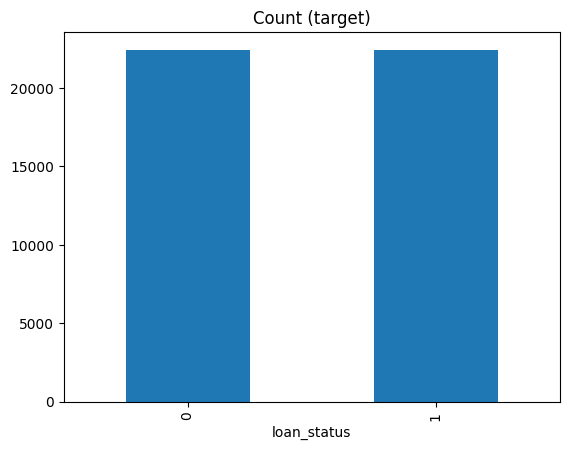

In [ ]:
# Over sample
# df_over is the updated over-sampled data frame
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over["loan_status"].value_counts())

df_over["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# In this assignment, we choose over-sample techniques.
# Now we split our dataset into input X and target value Y.

# Drop the labels from the data frame.
drop_df_over = df_over.drop(['loan_status'],axis=1)
X = drop_df_over.values

# Get the labels separately
y = df_over['loan_status'].values

# Now we split the data into training dataset and test dataset.
# We use 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now we standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Task 1: Data Visualisation - (10 marks)

Visualize some (at least two) other variables in the **over-sampled dataset**.
Note that column names have changed after we convert categorical variable into dummy/indicator variables.

#### Our first graph:
Our purpose is to explore the relationship between person age and person income (here we use scatter plot):

<Axes: title={'center': 'person_income VS person_age'}, xlabel='person_age', ylabel='person_income'>

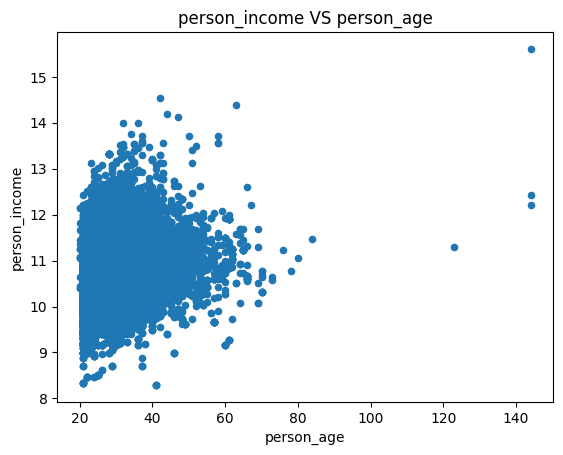

In [ ]:


drop_df_over.plot(kind = "scatter", x="person_age", y= 'person_income',title="person_income VS person_age" )



Explanation:

This graph seems to suggested that the person_income seems to more postively corelated to the age. The one who has higher age seems to have higher person income. (but it is unlikely that we have data when the age>120 and it looks like  mistakes in the data)


#### Our second graph:
Our purpose is to explore the relationship between person income and loan percent income (here we use scatter plot):

<Axes: title={'center': 'loan_percent_income VS person_income'}, xlabel='person_income', ylabel='loan_percent_income'>

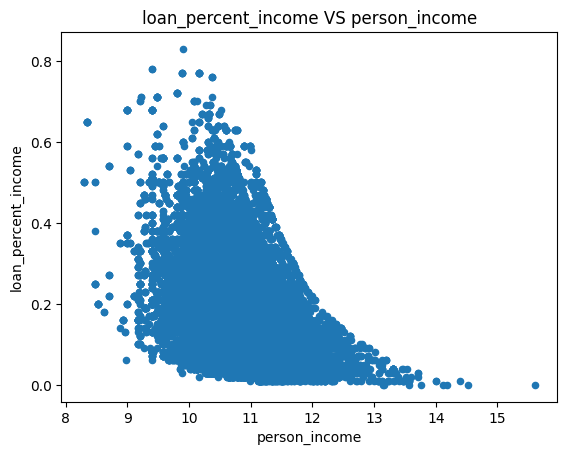

In [ ]:
drop_df_over.plot(kind = "scatter", x="person_income", y= "loan_percent_income",title="loan_percent_income VS person_income")

- This graph seems to suggest that the person_income is negatively corelated to loan_percent_income since we couldnt see lower loan_percent_income when the person_income is high.

#### Our third graph:
Our purpose is to explore the relationship between loan interest rate and person income (here we use scatter plot):

-

<Axes: title={'center': 'person_income VS loan_int_rate'}, xlabel='loan_int_rate', ylabel='person_income'>

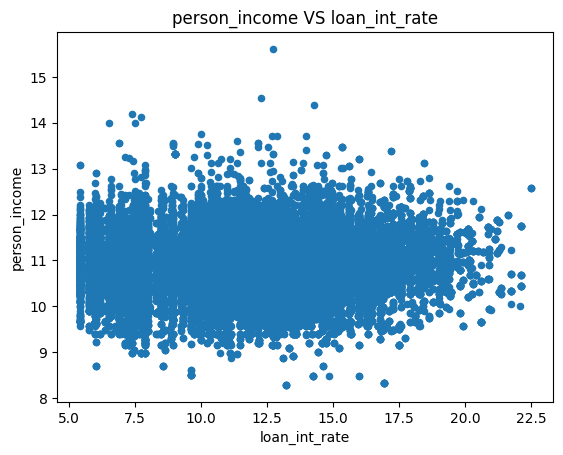

In [ ]:
drop_df_over.plot(kind = "scatter", x="loan_int_rate", y= "person_income",title="person_income VS loan_int_rate")


- From the graph,it seems like the loan interest rate is not strongly related to person_income because the pattern of person_income doesnt change a lot if we change the loan_int_rate.


## Task 2: Training a Traditional Machine Learning Model	- (25 Marks)

Train a machine learning model for predicting loan default with a machine learning algorithm discussed during the lectures **(Week 10 to Week 12)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? What is the accuracy of the model on the test set?

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

log_reg = linear_model.LogisticRegression() #train the logistic regression using our training datas
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)  #we train and predict the label using our trained model on test set.

print("Accuracy score on model: ", accuracy_score(y_test, y_pred))

Accuracy score on model:  0.7851571205705371


Which machine learning algorithm did you choose, and why?

- We use logistic regression because we want to model the relationship between a binary dependent variable (we can see the label is 1 or 0 in loan_status).Based on it, we can guess what is the probablity of whether the loan_status is 1 or 0. The reason I dont choose linear regression because the dependent variable (loan_status) is not continuous.

What is the accuracy of the model on the test set?

- Our accuracy is 0.783597058168041. Assume the data is balanced ,the model seems to be accurate into some extent but not too accurate.It is better to have further analysis with other model.


## Task 3: Training a Neural Network-based Model - (25 Marks)

Train an artificial neural network (Multi-Layered Perceptron Classifier (MLP)) model for loan default prediction. What is the accuracy of the model on the test set?

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=42)    #We create our Multi-Layered Perceptron Classifier to do the same thing again
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f \n' % accuracy)

Accuracy: 0.8505 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- Our Accuracy is 0.8505. Compare to the logistic model (the accuracy is less than 0.8), it seems the performance is better. It is expected because MLP is a more complicated model compared with logistic regression.It implied it could capture more complicated patterns.

Next we can tune the hyeprparamters to explore the difference.
We choose three layers 3,4,5 only due to the long running time:



In [ ]:
for num_layer in range(3,6):
  nlp=MLPClassifier(hidden_layer_sizes=(100,)*num_layer) # in this task we tune the number of layers to explore different acccuracies.
  nlp.fit(X_train,y_train)
  y_pred = nlp.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("Number of hidden layers: ",num_layer,"Accuracy:",accuracy ) #we print out the accuracy with the number of layers


Number of hidden layers:  3 Accuracy: 0.9394918653889013
Number of hidden layers:  4 Accuracy: 0.9292400267439269
Number of hidden layers:  5 Accuracy: 0.942834856251393


- We can see that the number of hidden layers affect the result. The accuracy jumps up after we use several layers.This implied the model can capture more complicated patterns.
But keep increasing number of hidden layers might not affect the result because over-complex model might result in overfitting problem.

We can also explore the effect of the number of each neurons in the model:

In [ ]:
for num_neurons in range(50, 201, 50):
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,))

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Neurons per Hidden Layer: {num_neurons}, Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Neurons per Hidden Layer: 50, Accuracy: 0.8422108312903944


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Neurons per Hidden Layer: 100, Accuracy: 0.8521283708491196


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Neurons per Hidden Layer: 150, Accuracy: 0.8536884332516158
Number of Neurons per Hidden Layer: 200, Accuracy: 0.866391798529084


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- We can see changing the number of neurons in each hidden layer in an MLP classifier actually affect the accuracy of the model on the dataset but it seems the accuracy doesnt change a lot in this case.

## Task 4: Model Explainability - (20 Marks)

SHAP importance is calculated on row level and can be used to understand what is important to a specific row. The values represent how a feature influences the prediction of a single row relative to the average outcome in the dataset.

It can be used to:

1. Understand which features most influence the predicted outcome.
2. Dive into a feature and understand how the different values of that feature affect the prediction.
3. Understand what is most influential on individual rows or subsets within the data.

In this task, you are expected to use SHAP (SHapley Additive exPlanations) to understand the model.

Get the SHAP importance for your traditional machine learning model (Task 2  above) using the **shap** library.

**Make sure you provide the visualisation of shap values**

Based on the visualization, can you explain how each feature is contributing to the final prediction of loan default? Does your explaination align with business sense?

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 14.1 MB/s eta 0:00:00


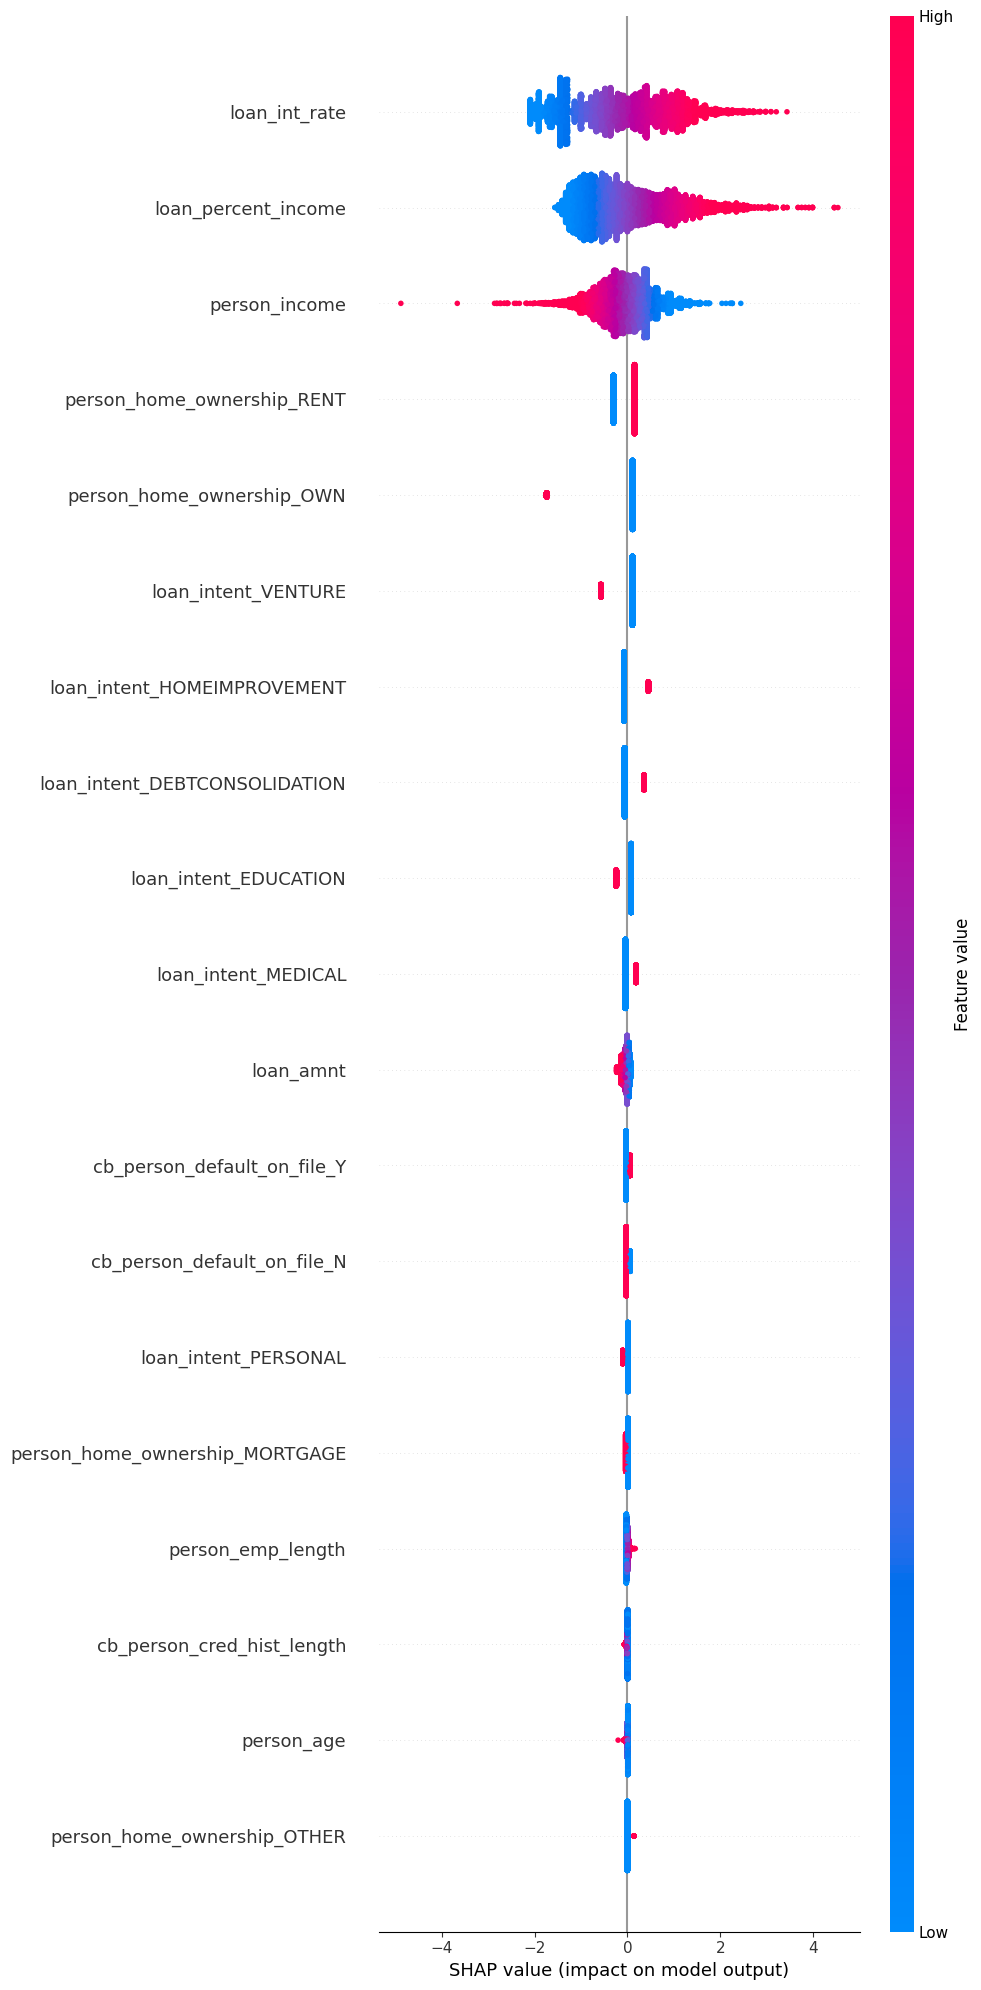

In [ ]:
# use SHAP (SHapley Additive exPlanations) to understand the model
import shap



X_df = drop_df_over

explainer = shap.LinearExplainer(log_reg, X_train)   #We plot our shap model with logistic regression
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_size=(10, 20), feature_names=X_df.columns)



From the graph, we can see that three features "loan_int_rate", "loan_percent_income" and "person income" are contributing significantly to the final prediction of loan default compared with other features.

- In the case of "loan_int_rate", and "loan_percent_intcome", we can see there is much more red color on the right than other features and the red color represents the positive values. The red color means there are higher feature values for that feature. The blue color means there are lower feature values for that feature. In this case, those higher feature values of "loan_int_rate", and "loan_percent_intcome" are on the right of the axis of SHAP.

- This told us that higher "loan_int_rate" and "loan_percent_income" have higher SHAP. This implied there are more positive significant impact on the output. This implied higher "loan_int_rate" and "loan_percent_income"  are more likely to have loan default.

These explanations align with business sense. It is expected that the people who have higher loan interest rates and loan percent income find it harder to return money. Higher loan interest rates imply they need to return more money than what they borrow. The high "loan_percent_income" implied a larger portion of the income would be dedicated to repaying the loan, which implied the borrower might have less money to return and cover other expenses.


- Conversely, we can see that the data points in "person income" tend to be blues when they are on the right side of the SHAP y-axis. This told us that higher "person income" will have negative SHAP which implied there are more negative significant impacts on the output. This implies higher  "person income" are more likely to have loan default.

This explanation aligns with business sense. It is expected that the one who has a higher income would have more money to return, so it is unlikely they would have less chance to have loan default.

We also have other less significant relationships between features and output and the explanation might. They don't have much influence on the output of the result as most of the dot points(no matter if they are red or blue) are close to the Y-axis.


- "Person_home_ownership_RENT' is slightly positively correlated to the output because there are red points on the right and blue dots on the left. It is expected that the one who rents the house could have a higher chance of not paying back the money because they might not have enough money after paying back the rent. This seems to have a business reason around it but it is not obvious.

- 'person_home_ownership_OWN' is slightly negatively correlated to the output as there are more blue points as people might be able to buy their house so they are less likely not to return the money. This seems to have a business reason around it but it is not obvious.

- The loan_intent of different items seemed not to be related to whether that borrower can return the money or not. It makes sense to me as the purpose is not directly related to the capability of repayment.

- Age or other features have no obvious relationship and they are not directly related to the capability of repayment as well.


In conclusion, these seem to align with business sense since they are not obvious features related to the capability of repayment.





## Task 5: Social Implications -

This task involves exploration of the social implications of algorithmic decision making in the context of credit risk prediction. In particular you
will be looking at bias and discrimination. As a preparation, read the MIT Technology Review article *Bias isn’t the only problem with credit scores—and no, AI can’t help* available as: https://www.technologyreview.com/2021/06/17/1026519/racial-bias-noisy-data-credit-scores-mortgage-loans-fairness-machine-learning/
1. **(5 marks)** Summarize the above reading in about 200 words.
2. **(5 marks)** Elaborate and explain in about 100 words the following sentence from this reading: "Incomplete data is troubling because detecting it will require researchers to have a fairly nuanced understanding of societal inequities".
3. **(10 marks)** In the context of the admittedly synthetic credit risk dataset you examined in this assignment, did you notice any possible issue of fairness and discrimination? Describe what steps you would recommend for alleviating such bias in the intended classification model.



-


#### Task (1):


- Biased algorithms disadvantage low-income and minority groups in decision-making of credit risk prediction but they are not the only variables. Economists Laura Blattner and Scott Nelson discovered these groups have less data in credit histories, making the prediction inaccurate. Their study showed the “noisy data” resulted in inaccurate predictions meant that scores might reflect creditworthiness inaccurately among those groups. They also built their simulation of the mortgage lender’s precision tool to see the impact of making loan decisions for these groups as accurately as those for wealthier white applicants. The result indicated more accurate data could reduce the gap in loan approvals by 50%. Half of the improvement for minority applicants comes from correcting the data error where they should have been approved but haven’t. Low-income applicants should see a smaller increase from correcting approvals they shouldn't have received.
Solving these issues is complex since minority groups avoid traditional credit due to distrust of banks.
This required new regulations and investment in minority communities. The government might push lenders to accept minority applicants to gather data. Some small lenders started to do this but this needs larger cultural shifts. Supplementary credit scores with other data such as bank transactions might help but more researches are needed. Awareness of Algorithmic bias is growing but noisy data need attention for equitable solutions.



#### Task (2):

- These sentences reflected the challenge of the researchers to understand the problem behind credit score prediction under complex socio-economic factors. Researchers need to know the historical and systemic biases related to the credit histories of minority and low-income groups making these data incomplete. They also need knowledge such as certain minority communities distrust the bank institution and how bad policies or practices exacerbate inequality. Trying to fix the algorithmic bias will not solve the problem because the bias is from complete data. The data itself cannot make accurate predictions which is context-based. It is challenging when these knowledges are outside their discipline.


#### Task (3):
We found several potential unfair / discrimination within this dataset and we will discuss only three examples below:


1. The loan data imbalance, with far more successful loans than defaults, can bias the model. It prioritizes learning patterns of good borrowers, potentially missing warning signs for defaults. This can lead to two unfair outcomes. First, the model might approve risky loans because it doesn't learn to identify red flags effectively. Second, creditworthy borrowers might be denied due to the model's struggle with limited data on defaults. Proper data pre-processing is crucial to mitigate this bias and ensure fair loan decisions.
We can also resample the data by oversampling or undersampling the data like the example above to try to normalize the data/balanece of data. We can also use different models that are less sensitive to imbalanced data.


Also, the model is the mirror of the data, making it possible to see the bias(or algorithmic bias) around the data from the model. Below are potential biases based on specific features when we look at the SHAP above.

2. Higher loan interest rate is more likely to related to loan default:

Decision based on assuming high interest rates equal high default risk can unfairly reject creditworthy borrowers. For example, a person with perfect payment history might be denied for loan application due to the their high loan interest rate which neglected the legitimate reason for it and focusing solely on the rate itself. This can disproportionately impact borrowers with high rates for valid reasons, limiting their access to credit and hindering their financial well-being.



3. Higher person income is less likely to related to loan default:

The decision based on this model might assumed lower income equals higher default risk. It might overlook some good low-income borrowers with stable finances while approving risky high-income borrowers. This discriminates against creditworthy low-income borrowers who deserve fair access to loans.


To alleviate these two biases, looking beyond loan interest rate or income (even beyond the features in out dataset) could reflect the true repayment ability. We can considers other potential features related to transaction history when we train our model. The social contextual understanding(e.g purpose of loans) embedded into the the training of model might prevent unfairly penalizing borrowers with legitimate justifications for higher rates.We can also do feature engineering to find the best features in our model.
Also, using different models (e.g., deep learning model) with hyperparameter tuning could better account for the true repayment behavior.
In addition,we might collect more data with more different features to see whether there are other co-factors since correlation doesn't imply causation.




